In [1]:
import pandas as pd, numpy as np, datetime as dt
import matplotlib.pyplot as plt
import os, json

In [2]:
import scienceplots
import matplotlib.ticker as ticker
plt.style.use(['science'])
FIG_WIDTH = 7.5  # width of figure in inches (a4 width)
TARGET_FOLDER = "/home/masc12/dev/masc12-mthesis/eda/img-eda/plots"

In [3]:
webcams = ['altenrhein', 'ebenalp', 'golfclub-erlen', 'kronberg', 'romanshorn', 'rorschacherberg', 'sitterdorf', 'wiler-turm']
wbc_cmap = json.loads(open('webcam_colormap.json').read())

In [4]:
df = pd.DataFrame()
for wbc in webcams:
    img_files = os.listdir(f"../../data/{wbc}")
    img_ts = [dt.datetime.strptime(img.split(".")[0], "%Y-%m-%d_%H-%M-%S") for img in img_files]
    img_files = pd.DataFrame({"filename": img_files, "timestamp": img_ts, "webcam": wbc})
    img_files.sort_values("timestamp", inplace=True)
    img_files.reset_index(drop=True, inplace=True)
    df = pd.concat([df, img_files])

In [5]:
df.describe()

,timestamp
count,142123
mean,2024-11-06 01:27:34.330403840
min,2024-02-12 08:00:00
25%,2024-09-14 19:40:00
50%,2024-11-12 12:00:00
75%,2025-01-13 17:00:00
max,2025-03-14 15:10:00


# stacked barplot w/ months

In [6]:
grouped_by_month = df.copy()
grouped_by_month["y-month"] = grouped_by_month["timestamp"].dt.to_period('M')
grouped_by_month = grouped_by_month.groupby(['webcam', 'y-month']).size().unstack(fill_value=0)
grouped_by_month = grouped_by_month.reindex(sorted(grouped_by_month.columns), axis=1)
grouped_by_month

y-month,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03
webcam,,,,,,,,,,,,,,
altenrhein,0,0,0,0,0,0,195,2847,2601,2369,2375,2386,1913,1143
ebenalp,0,0,0,0,0,0,286,2481,2488,2218,2218,2254,1802,991
golfclub-erlen,0,0,0,0,1494,2723,2521,2132,1849,1505,1389,1484,1552,888
kronberg,0,0,0,0,0,2,3081,2840,2603,2371,2368,2405,2246,1136
romanshorn,0,0,0,0,0,0,386,2833,2603,2368,2378,2407,2290,1154
rorschacherberg,1084,2093,1555,2703,2678,2655,2590,2132,865,1545,1478,1580,1641,913
sitterdorf,0,0,0,0,0,0,0,953,2779,2844,2974,2972,2636,1298
wiler-turm,0,0,0,0,0,0,780,2842,2598,2180,2374,2409,2235,1162


<Figure size 350x262.5 with 0 Axes>

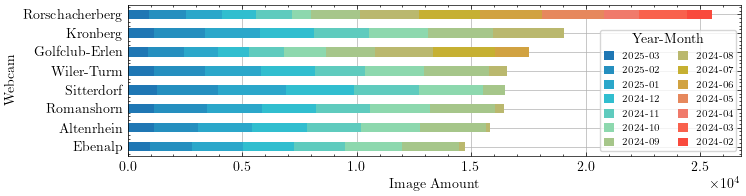

In [7]:
color_gradient = [
    "#1f77b4",  # Dark Blue (start)
    "#258fbf",
    "#2ba7ca",
    "#31becf",  # Teal (1st base)
    "#5fcbbe",
    "#8dd8ae",  # Light green
    "#a6c68a",  # Light yellow-green (new transition)
    "#bab86e",  # Light orange
    "#c6b032",  # Yellow-green (2nd base)
    "#d1a241",
    "#e6885d",
    "#f07a6b",
    "#f9614d",   # Orange 
    "#f94a3d"
]


grouped_sorted = grouped_by_month.loc[grouped_by_month.sum(axis=1).sort_values(ascending=True).index]

# Reverse stacking order (newest closer to axis)
grouped_sorted = grouped_sorted[grouped_sorted.columns[::-1]]

plt.clf()
plt.figure(figsize=(FIG_WIDTH, 2))
grouped_sorted.plot(kind='barh', stacked=True, ax=plt.gca(), color=color_gradient)

plt.yticks(
    ticks=range(len(grouped_sorted.index)),
    labels=[str(label).title() for label in grouped_sorted.index]
)


plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

plt.xlabel('Image Amount')
plt.ylabel('Webcam')

plt.grid(True)
plt.gca().set_axisbelow(True)

plt.legend(title='Year-Month', ncol=2, loc='lower right', handlelength=1, handleheight=1, frameon=True, fontsize=7)
plt.tight_layout(pad=0.5)
plt.savefig(f"{TARGET_FOLDER}/amount-per-month.png", dpi=300)
plt.show()


# lineplot per day over time

In [8]:
grouped_by_day = df.copy()
grouped_by_day["ymd"] = grouped_by_day["timestamp"].dt.to_period('D')
grouped_by_day = grouped_by_day.groupby(["webcam", "ymd"]).count()
grouped_by_day = grouped_by_day.reset_index()
grouped_by_day = grouped_by_day.rename(columns={"timestamp": "count"})
grouped_by_day["ymd"] = pd.to_datetime(grouped_by_day["ymd"].astype(str))
grouped_by_day

,webcam,ymd,filename,count
0,altenrhein,2024-08-29,1,1
1,altenrhein,2024-08-30,97,97
2,altenrhein,2024-08-31,97,97
3,altenrhein,2024-09-01,97,97
4,altenrhein,2024-09-02,97,97
...,...,...,...,...
1839,wiler-turm,2025-03-10,86,86
1840,wiler-turm,2025-03-11,86,86
1841,wiler-turm,2025-03-12,86,86
1842,wiler-turm,2025-03-13,86,86


In [9]:
grouped_by_day.groupby(["webcam"]).mean()["count"].mean()

78.75445474906877

<Figure size 350x262.5 with 0 Axes>

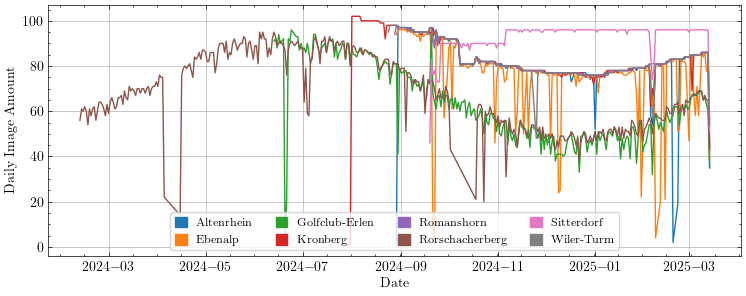

In [10]:
plt.clf()
plt.figure(figsize=(FIG_WIDTH, 3))
for webcam, data in grouped_by_day.groupby("webcam"):
    plt.plot(data["ymd"], data["count"], label=webcam, color=wbc_cmap[webcam])     #, marker='.')
    # plt.scatter(data["ymd"], data["count"], label=webcam, s=7)

plt.xlabel("Date")
plt.ylabel("Daily Image Amount")
# plt.title("Image Amount per Day")

plt.grid(True)
plt.gca().set_axisbelow(True)

handles = [plt.Rectangle((0,0),1,1, color=wbc_cmap[wbc]) for wbc in webcams]
plt.legend(handles, [w.title() for w in webcams], frameon=True, loc='lower center', handlelength=1, handleheight=1, fontsize="small", ncol=4)

plt.tight_layout(pad=0.5)
plt.savefig(f"{TARGET_FOLDER}/amount-per-day.png", dpi=300)
plt.show()

In [11]:
grouped_by_day[grouped_by_day['webcam'] == "sitterdorf"]

,webcam,ymd,filename,count
1466,sitterdorf,2024-09-19,46,46
1467,sitterdorf,2024-09-20,83,83
1468,sitterdorf,2024-09-21,76,76
1469,sitterdorf,2024-09-22,78,78
1470,sitterdorf,2024-09-23,74,74
...,...,...,...,...
1638,sitterdorf,2025-03-10,96,96
1639,sitterdorf,2025-03-11,96,96
1640,sitterdorf,2025-03-12,96,96
1641,sitterdorf,2025-03-13,96,96


<Figure size 350x262.5 with 0 Axes>

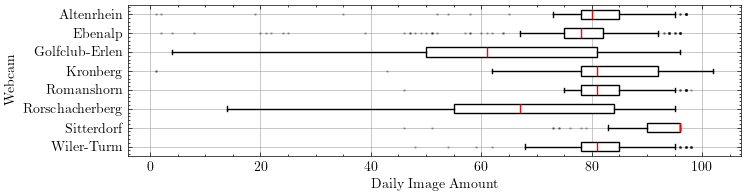

In [12]:
# clear previous plot
plt.clf()

plt.figure(figsize=(FIG_WIDTH, 2))
# plt.title('Distribution of webcam images per day')
plt.xlabel('Daily Image Amount')
plt.ylabel('Webcam')
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.boxplot(
    [grouped_by_day[grouped_by_day["webcam"] == wbc]["count"] for wbc in list(reversed(webcams))],
    vert=False,
    tick_labels=[w.title() for w in reversed(webcams)],
    patch_artist=True,
    boxprops=dict(facecolor='white', color='black'),
    medianprops=dict(color='red'),
    flierprops=dict(marker='o', markersize=1, markerfacecolor='black', linestyle='none', alpha=0.2),
)

plt.tight_layout(pad=0.5)
plt.savefig(f"{TARGET_FOLDER}/amount-boxplot-per-day.png", dpi=300)
plt.show()


💡 inherently due to having more data, i.e. summer+winter, some locations have more/less variance than others

# lineplot cumulative sum  over time

In [13]:
grouped_by_day["cumsum"] = grouped_by_day.groupby("webcam")["count"].cumsum()

In [14]:
totals = {}
for wbc in grouped_by_day["webcam"].unique():
    totals[wbc] = grouped_by_day[grouped_by_day["webcam"] == wbc]["cumsum"].max()
sorted_list_keys = sorted(totals, key=totals.get, reverse=True)

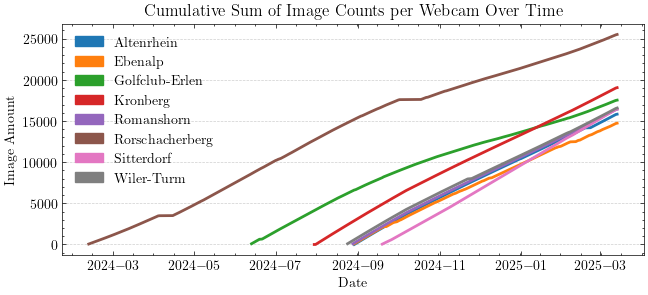

In [18]:
# Plot
plt.figure(figsize=(FIG_WIDTH, 3))
for wbc in webcams:
    data = grouped_by_day[grouped_by_day["webcam"] == wbc]
    plt.plot(data["ymd"], data["cumsum"], label=wbc, linewidth=2, color=wbc_cmap[wbc]) #, marker='.')

plt.xlabel("Date")
plt.ylabel("Image Amount")
plt.title("Cumulative Sum of Image Counts per Webcam Over Time")

handles = [plt.Rectangle((0,0),1,1, color=wbc_cmap[wbc]) for wbc in webcams]
plt.legend(handles, [w.title() for w in webcams])

plt.grid(True, linestyle='--', alpha=0.6, axis="y")
plt.show()


# Stacked area chart / cumsum over time

In [16]:
# labels for stackplot
totals_sorted = sorted(totals.items(), key=lambda x: x[1])
data_labels, values = zip(*totals_sorted)
cumulative_values = np.cumsum(values)

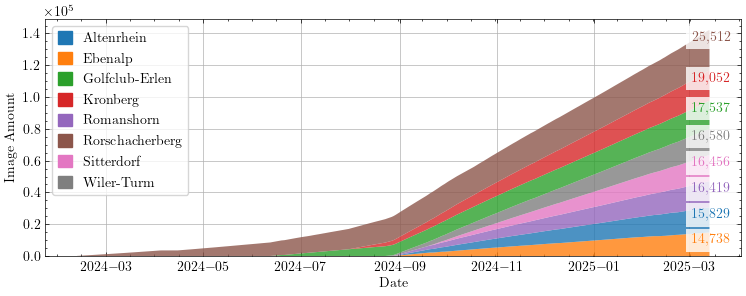

In [19]:
pivot_df = grouped_by_day.pivot(index="ymd", columns="webcam", values="cumsum").ffill()
pivot_df = pivot_df[sorted_list_keys[::-1]]  # Reorder columns
pivot_df = pivot_df.fillna(0)


plt.figure(figsize=(FIG_WIDTH, 3))
plt.stackplot(pivot_df.index, pivot_df.T, labels=pivot_df.columns, alpha=0.8, colors=[wbc_cmap[wbc] for wbc in pivot_df.columns])

for i in range(len(data_labels)):
    plt.text(
      pivot_df.index[-12],  # Position at the end of the line
      cumulative_values[i] - 7000,  # Adjust for spacing
      f"{values[i]:,}",  # Format with thousands separator
      color=wbc_cmap[data_labels[i]], 
      fontsize=10, 
      weight='heavy',
      bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)  # Background box
    )

# Labels and title
plt.xlabel("Date")
plt.ylabel("Image Amount")
# plt.title("Cumulative Sum of Image Counts per Webcam Over Time")

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

handles = [plt.Rectangle((0,0),1,1, color=wbc_cmap[wbc]) for wbc in webcams]
plt.legend(handles, [w.title() for w in webcams], frameon=True, loc='upper left', handlelength=1, handleheight=1)

plt.grid(True)
plt.gca().set_axisbelow(True)

plt.tight_layout(pad=0.5)
plt.savefig(f"{TARGET_FOLDER}/amount_cumsum.png", dpi=300)

plt.show()